# Task: Exploratory Data Analysis on MissionEd's Survey Data

# Data Preprocessing

In [1]:
import math
import warnings 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from scipy import signal
%matplotlib inline

In [2]:
# Let's import to our data and check the basics.
data = pd.read_csv('C:/Users/hp/Desktop/MissionEd Survey.csv',encoding='ISO-8859-1')

In [3]:
data.head(20)

,Age,Gender,State,City,Preferred Products (choice 1),Preferred Products (choice 2),Preferred Products (choice 3),Preferred Products (choice 4),Preferred Products (choice 5)
0,78,Male,PUNJAB,Tier 3,Amazon Prime Subscription,Men's Shoes Sneakers,Fifty Shades of Grey,Fogg Perfume for Men,Fire Boltt Headphones
1,41,Female,Himachal,Tier 3,Color Fit Pro Smartwatch,Amazon Prime Subscription,Fire Boltt Headphones,Fifty Shades of Grey,OptioLeather Wallet for Men 6
2,19,Male,New Delhi,Tier 3,pTron Lite Earphones,Men's Shoes Sneakers,Color Fit Pro Smartwatch,Amazon Prime Subscription,OptioLeather Wallet for Men 6
3,19,Male,New Delhi,Tier 1,Men's Shoes Sneakers,Color Fit Pro Smartwatch,pTron Lite Earphones,Fogg Perfume for Men,Fire Boltt Headphones
4,43,Male,Delhi,Tier 1,Amazon Prime Subscription,Men's Shoes Sneakers,Fogg Perfume for Men,Color Fit Pro Smartwatch,Fire Boltt Headphones
5,20,Male,New Delhi,Tier 1,Amazon Prime Subscription,Men's Shoes Sneakers,Color Fit Pro Smartwatch,Fire Boltt Headphones,Fogg Perfume for Men
6,40,Male,Uttar Pradesh,Tier 2,Men's Shoes Sneakers,Amazon Prime Subscription,Color Fit Pro Smartwatch,Fogg Perfume for Men,OptioLeather Wallet for Men 6
7,19,Male,Delhi,NaN,Men's Shoes Sneakers,Men's Shoes Sneakers,Fogg Perfume for Men,Men's Shoes Sneakers,Fogg Perfume for Men
8,20,Female,New Delhi,Tier 1,pTron Lite Earphones,Fogg Perfume for Men,Amazon Prime Subscription,Fifty Shades of Grey,OptioLeather Wallet for Men 6
9,19,Male,New delhi,Tier 1,Fire Boltt Headphones,pTron Lite Earphones,Men's Shoes Sneakers,Color Fit Pro Smartwatch,Fifty Shades of Grey


In [4]:
#To check the null velues in the dataset
data.isnull().sum()

Age                                0
Gender                             0
State                              0
City                             201
Preferred Products (choice 1)      0
Preferred Products (choice 2)      0
Preferred Products (choice 3)      0
Preferred Products (choice 4)      0
Preferred Products (choice 5)      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            3103 non-null   int64 
 1   Gender                         3103 non-null   object
 2   State                          3103 non-null   object
 3   City                           2902 non-null   object
 4   Preferred Products (choice 1)  3103 non-null   object
 5   Preferred Products (choice 2)  3103 non-null   object
 6   Preferred Products (choice 3)  3103 non-null   object
 7   Preferred Products (choice 4)  3103 non-null   object
 8   Preferred Products (choice 5)  3103 non-null   object
dtypes: int64(1), object(8)
memory usage: 218.3+ KB


In [6]:
data.State.value_counts()

Delhi           965
Haryana         154
New Delhi       152
Punjab          151
New delhi       140
               ... 
Pathankot        13
Chattisgarh      13
Patna            13
Tamil nadu       13
Bhubaneshwar     13
Name: State, Length: 64, dtype: int64

In [7]:
data.columns

Index(['Age ', 'Gender ', 'State', 'City ', 'Preferred Products (choice 1)',
       'Preferred Products (choice 2)', 'Preferred Products (choice 3)',
       'Preferred Products (choice 4)', 'Preferred Products (choice 5)'],
      dtype='object')

In [8]:
data['Preferred Products (choice 1)']

0       Amazon Prime Subscription
1        Color Fit Pro Smartwatch
2            pTron Lite Earphones
3            Men's Shoes Sneakers
4       Amazon Prime Subscription
                  ...            
3098        Fire Boltt Headphones
3099        Fire Boltt Headphones
3100     Color Fit Pro Smartwatch
3101     Color Fit Pro Smartwatch
3102         Fogg Perfume for Men
Name: Preferred Products (choice 1), Length: 3103, dtype: object

In [9]:
data['City ']

0       Tier 3
1       Tier 3
2       Tier 3
3       Tier 1
4       Tier 1
         ...  
3098    Tier 3
3099    Tier 2
3100    Tier 2
3101    Tier 2
3102    Tier 1
Name: City , Length: 3103, dtype: object

# Destructive Feature of data

In [10]:
print("Maximum first preference is :", data['Preferred Products (choice 1)'].value_counts().idxmax())

Maximum first preference is : Fire Boltt Headphones


In [11]:
print("Maximum second preference is :", data['Preferred Products (choice 2)'].value_counts().idxmax())

Maximum second preference is : Fogg Perfume for Men


In [12]:
print("Maximum third preference is :", data['Preferred Products (choice 3)'].value_counts().idxmax())

Maximum third preference is : Fogg Perfume for Men


In [13]:
print("Maximum fourth preference is :", data['Preferred Products (choice 4)'].value_counts().idxmax())

Maximum fourth preference is : Men's Shoes Sneakers


In [14]:
print("Maximum fifth preference is :", data['Preferred Products (choice 5)'].value_counts().idxmax())

Maximum fifth preference is : Amazon Prime Subscription


# Data Visualisation

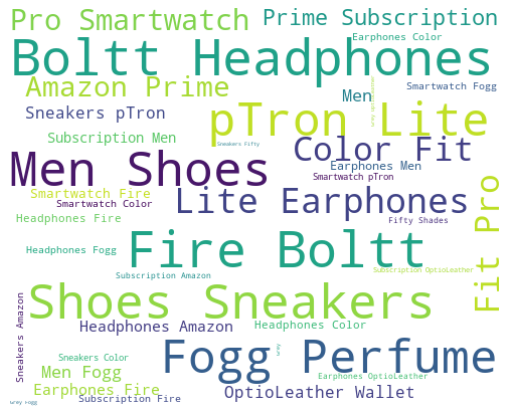

In [15]:
temp = data['Preferred Products (choice 1)'].dropna(False)
plt.subplots(figsize=(9,8))
wordcloud = WordCloud(background_color = 'white',
                     max_font_size=50,
                     width = 500,
                     height = 400).generate(' '.join(temp))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')

Text(0, 0.5, 'Count')

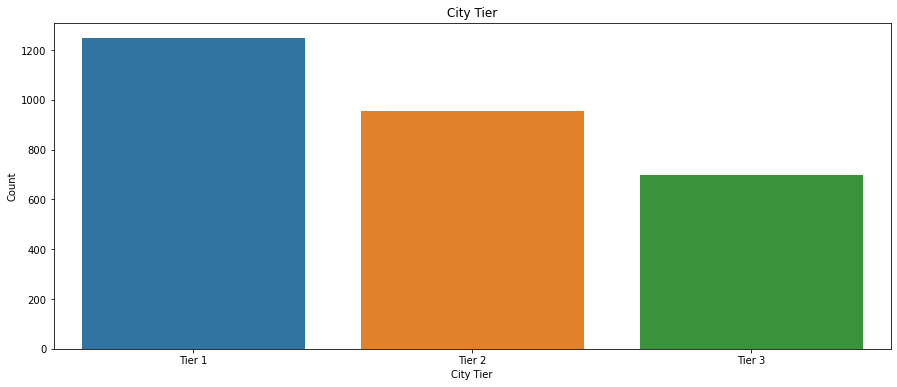

In [16]:
plt.subplots(figsize=(15,6))
sns.barplot(data['City '].value_counts().index,data['City '].value_counts().values)
plt.title('City Tier')
plt.xlabel('City Tier')
plt.ylabel('Count')

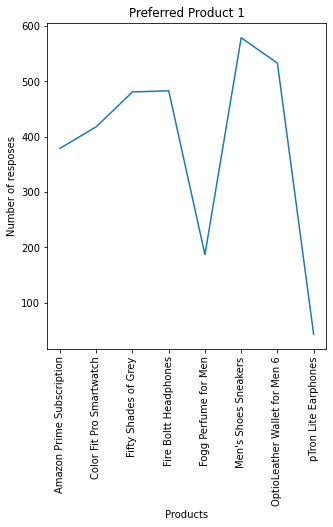

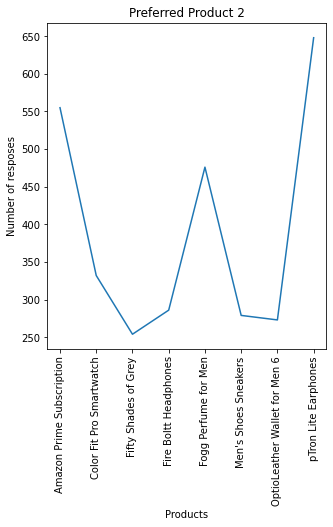

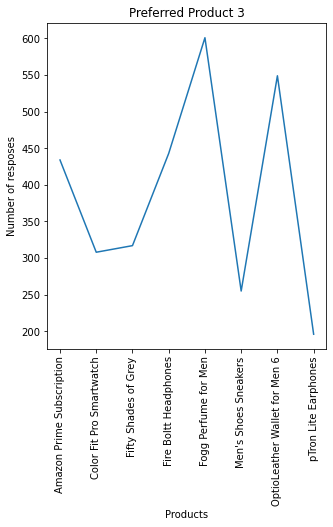

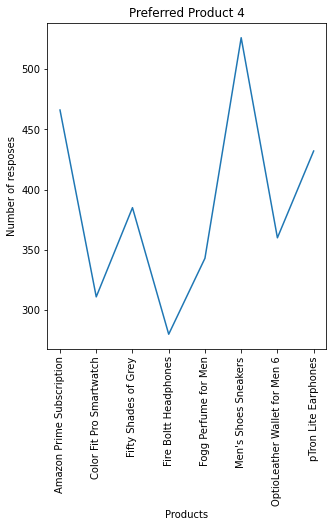

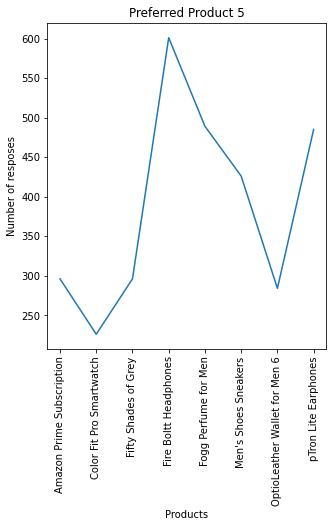

In [17]:
x_year = data['Preferred Products (choice 1)'].unique()
y_count = data['Preferred Products (choice 1)'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (5,6))
sns.lineplot(x = x_year,
             y = y_count) 
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Number of resposes')
plt.title('Preferred Product 1')
plt.show()

x_year = data['Preferred Products (choice 2)'].unique()
y_count = data['Preferred Products (choice 2)'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (5,6))
sns.lineplot(x = x_year,
             y = y_count) 
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Number of resposes')
plt.title('Preferred Product 2')
plt.show()

x_year = data['Preferred Products (choice 3)'].unique()
y_count = data['Preferred Products (choice 3)'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (5,6))
sns.lineplot(x = x_year,
             y = y_count) 
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Number of resposes')
plt.title('Preferred Product 3')
plt.show()

x_year = data['Preferred Products (choice 4)'].unique()
y_count = data['Preferred Products (choice 4)'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (5,6))
sns.lineplot(x = x_year,
             y = y_count) 
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Number of resposes')
plt.title('Preferred Product 4')
plt.show()

x_year = data['Preferred Products (choice 5)'].unique()
y_count = data['Preferred Products (choice 5)'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (5,6))
sns.lineplot(x = x_year,
             y = y_count) 
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Number of resposes')
plt.title('Preferred Product 5')
plt.show()

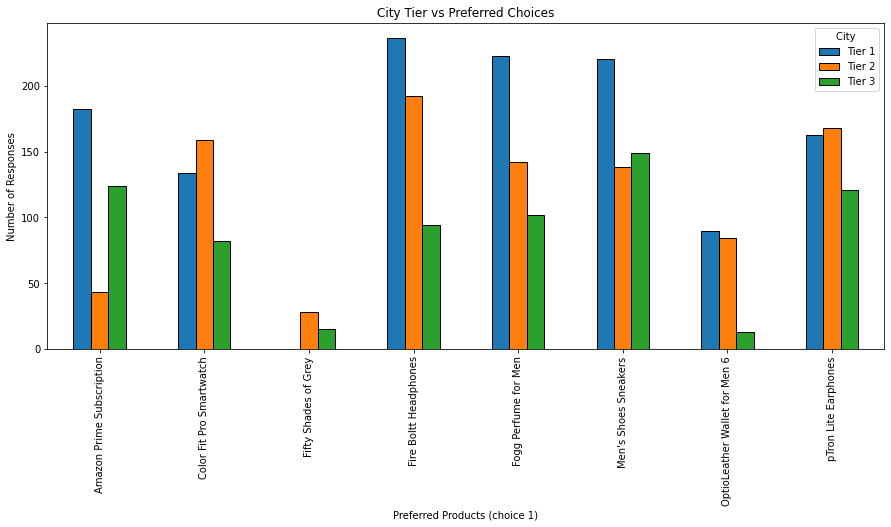

In [18]:
pd.crosstab(data['Preferred Products (choice 1)'], data['City ']).plot(kind='bar',figsize=(15,6), edgecolor = 'black')
plt.title('City Tier vs Preferred Choices')
plt.ylabel('Number of Responses')
plt.show()

In [19]:
product_categories = data['Preferred Products (choice 1)'].value_counts()

Text(-0.9, 1.25, 'PIE Diagram for PRODUCT CATEGORIES for Choice 1')

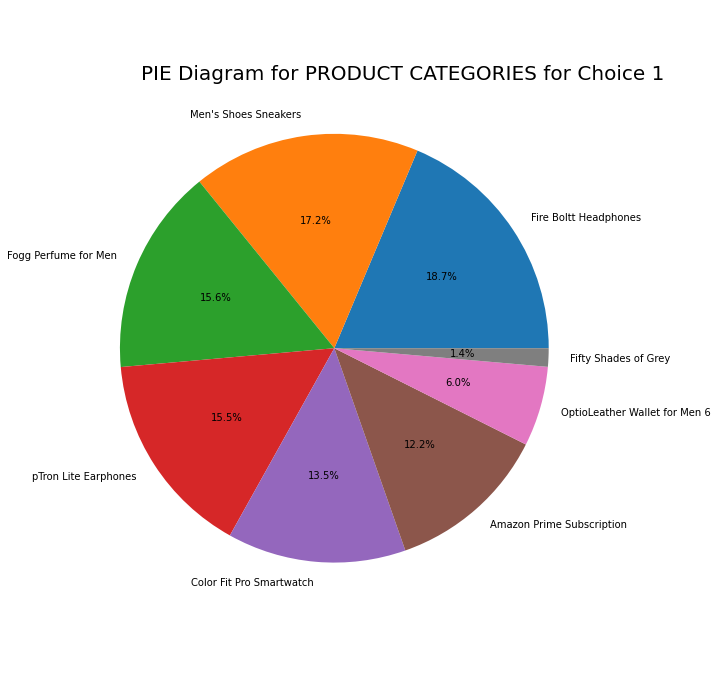

In [20]:
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for PRODUCT CATEGORIES for Choice 1', fontsize=20)

Text(-0.9, 1.25, 'PIE Diagram for PRODUCT CATEGORIES for Choice 2')

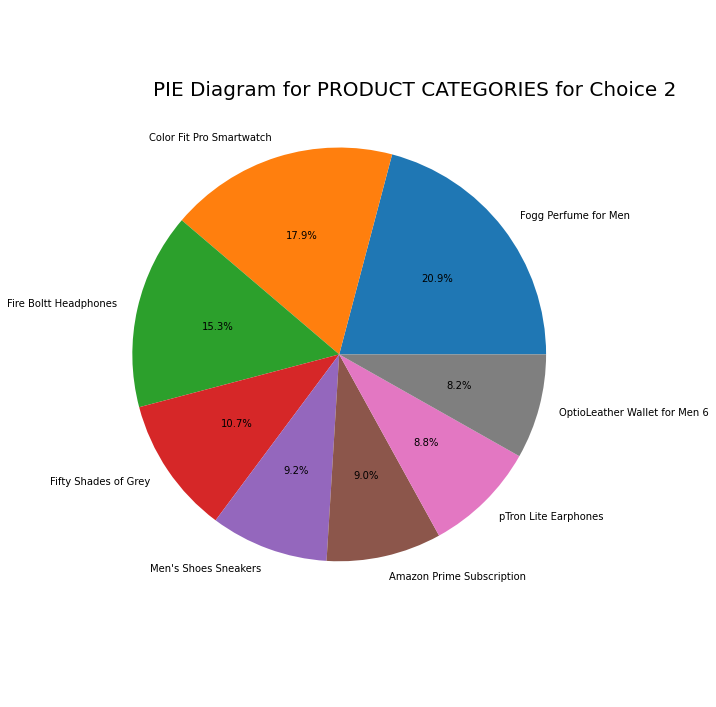

In [21]:
product_categories = data['Preferred Products (choice 2)'].value_counts()
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for PRODUCT CATEGORIES for Choice 2', fontsize=20)

Text(-0.9, 1.25, 'PIE Diagram for PRODUCT CATEGORIES for Choice 3')

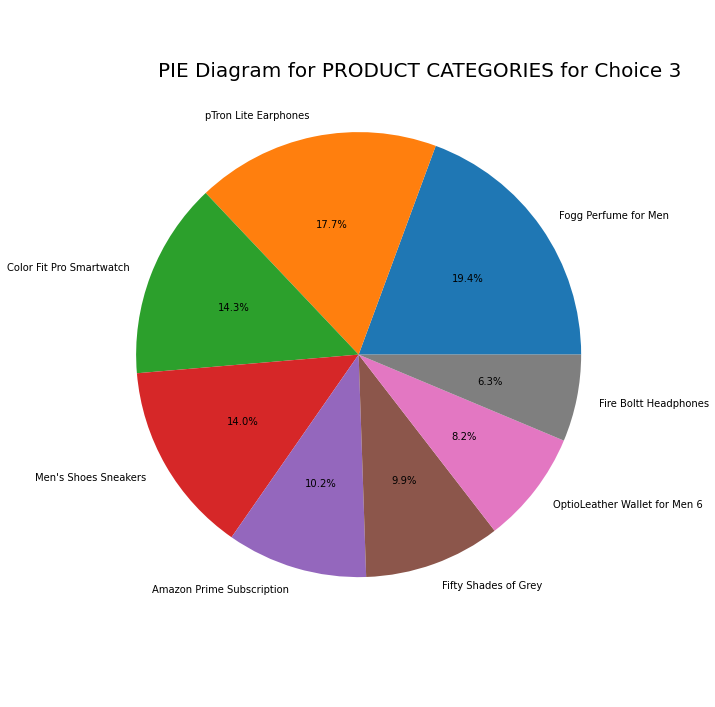

In [22]:
product_categories = data['Preferred Products (choice 3)'].value_counts()
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for PRODUCT CATEGORIES for Choice 3', fontsize=20)

Text(-0.9, 1.25, 'PIE Diagram for PRODUCT CATEGORIES for Choice 4')

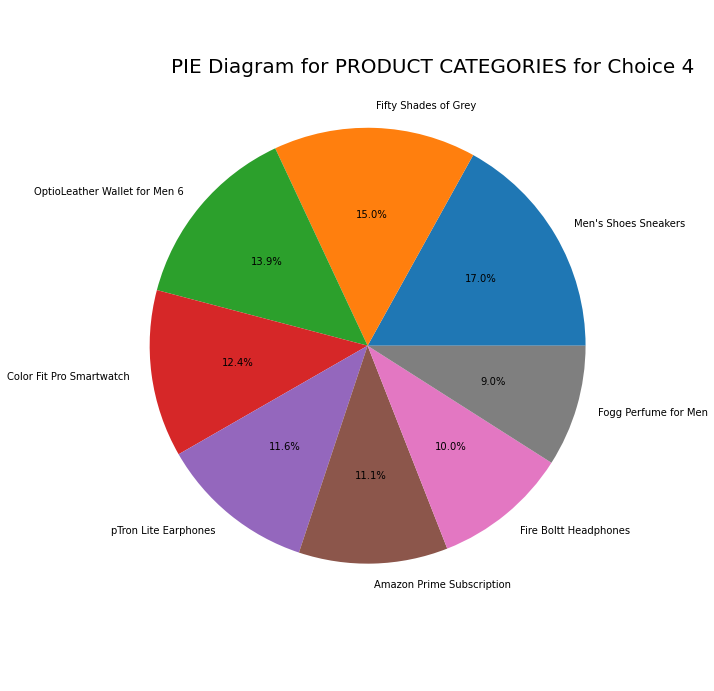

In [23]:
product_categories = data['Preferred Products (choice 4)'].value_counts()
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for PRODUCT CATEGORIES for Choice 4', fontsize=20)

Text(-0.9, 1.25, 'PIE Diagram for PRODUCT CATEGORIES for Choice 5')

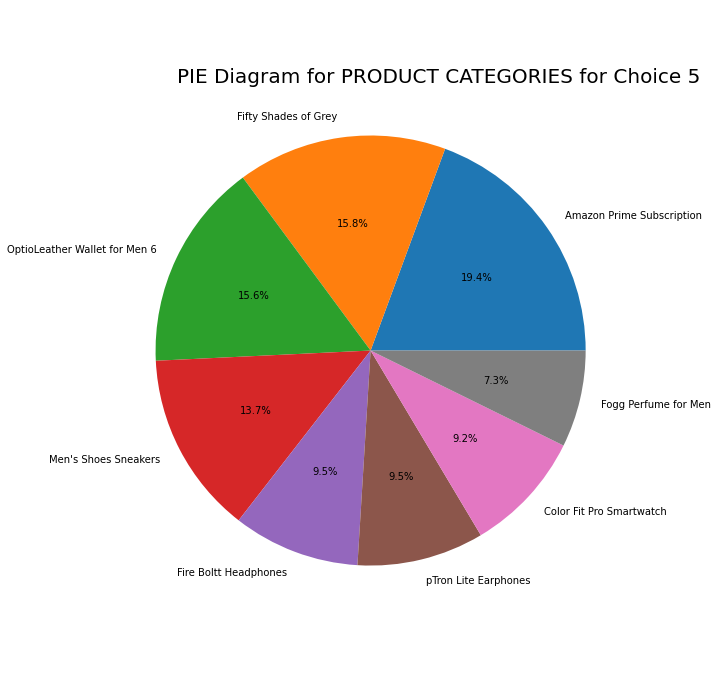

In [24]:
product_categories = data['Preferred Products (choice 5)'].value_counts()
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for PRODUCT CATEGORIES for Choice 5', fontsize=20)

# ML Model to predict categories

In [25]:
train_data = data[: 2999]
test_data = data[2999 :]

In [26]:
train_data.head()

,Age,Gender,State,City,Preferred Products (choice 1),Preferred Products (choice 2),Preferred Products (choice 3),Preferred Products (choice 4),Preferred Products (choice 5)
0,78,Male,PUNJAB,Tier 3,Amazon Prime Subscription,Men's Shoes Sneakers,Fifty Shades of Grey,Fogg Perfume for Men,Fire Boltt Headphones
1,41,Female,Himachal,Tier 3,Color Fit Pro Smartwatch,Amazon Prime Subscription,Fire Boltt Headphones,Fifty Shades of Grey,OptioLeather Wallet for Men 6
2,19,Male,New Delhi,Tier 3,pTron Lite Earphones,Men's Shoes Sneakers,Color Fit Pro Smartwatch,Amazon Prime Subscription,OptioLeather Wallet for Men 6
3,19,Male,New Delhi,Tier 1,Men's Shoes Sneakers,Color Fit Pro Smartwatch,pTron Lite Earphones,Fogg Perfume for Men,Fire Boltt Headphones
4,43,Male,Delhi,Tier 1,Amazon Prime Subscription,Men's Shoes Sneakers,Fogg Perfume for Men,Color Fit Pro Smartwatch,Fire Boltt Headphones


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            2999 non-null   int64 
 1   Gender                         2999 non-null   object
 2   State                          2999 non-null   object
 3   City                           2807 non-null   object
 4   Preferred Products (choice 1)  2999 non-null   object
 5   Preferred Products (choice 2)  2999 non-null   object
 6   Preferred Products (choice 3)  2999 non-null   object
 7   Preferred Products (choice 4)  2999 non-null   object
 8   Preferred Products (choice 5)  2999 non-null   object
dtypes: int64(1), object(8)
memory usage: 211.0+ KB


In [28]:
train_data.describe()

,Age
count,2999.000000
mean,30.704902
std,15.358294
min,12.000000
25%,20.000000
50%,23.000000
75%,40.000000
max,90.000000


In [29]:
train_data['State'].value_counts()

Delhi           913
Haryana         150
Punjab          148
New Delhi       147
New delhi       134
               ... 
Pathankot        13
Chattisgarh      13
Patna            13
Tamil nadu       13
Bhubaneshwar     13
Name: State, Length: 64, dtype: int64

In [30]:
test_data.head()

,Age,Gender,State,City,Preferred Products (choice 1),Preferred Products (choice 2),Preferred Products (choice 3),Preferred Products (choice 4),Preferred Products (choice 5)
2999,21,Female,Delhi,Tier 1,Fogg Perfume for Men,Color Fit Pro Smartwatch,Color Fit Pro Smartwatch,Color Fit Pro Smartwatch,Men's Shoes Sneakers
3000,19,Male,New delhi,Tier 2,Color Fit Pro Smartwatch,Fire Boltt Headphones,Fogg Perfume for Men,Men's Shoes Sneakers,Fogg Perfume for Men
3001,21,Male,Delhi,Tier 3,Fire Boltt Headphones,Color Fit Pro Smartwatch,Fogg Perfume for Men,pTron Lite Earphones,OptioLeather Wallet for Men 6
3002,20,Male,Delhi,Tier 2,Fire Boltt Headphones,Color Fit Pro Smartwatch,Fogg Perfume for Men,pTron Lite Earphones,Men's Shoes Sneakers
3003,18,Female,Delhi,Tier 3,Color Fit Pro Smartwatch,Fire Boltt Headphones,pTron Lite Earphones,Men's Shoes Sneakers,Men's Shoes Sneakers


In [31]:
test_data.describe()

,Age
count,104.000000
mean,27.990385
std,15.713759
min,14.000000
25%,19.000000
50%,20.000000
75%,31.250000
max,90.000000


In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [35]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['Age '])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [36]:
num_pipeline.fit_transform(train_data)

array([[78.],
       [41.],
       [19.],
       ...,
       [23.],
       [20.],
       [24.]])

In [37]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['Preferred Products (choice 1)', 'Preferred Products (choice 2)', 'Preferred Products (choice 3)', 'Preferred Products (choice 4)', 'Preferred Products (choice 5)'])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [40]:
cat_pipeline.fit_transform(train_data)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
from sklearn.pipeline import FeatureUnion


preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [42]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [43]:
y_train = train_data['Preferred Products (choice 1)']

In [44]:
from sklearn.svm import SVC

In [45]:
svm_clf = SVC(gamma="auto", random_state=42)

In [46]:
svm_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [47]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)
y_pred

array(['Fogg Perfume for Men', 'Color Fit Pro Smartwatch',
       'Fire Boltt Headphones', 'Fire Boltt Headphones',
       'Color Fit Pro Smartwatch', 'Fire Boltt Headphones',
       'Amazon Prime Subscription', 'Color Fit Pro Smartwatch',
       'pTron Lite Earphones', "Men's Shoes Sneakers",
       'Amazon Prime Subscription', 'Amazon Prime Subscription',
       "Men's Shoes Sneakers", "Men's Shoes Sneakers",
       'pTron Lite Earphones', 'Fire Boltt Headphones',
       'Amazon Prime Subscription', "Men's Shoes Sneakers",
       'Fire Boltt Headphones', 'Amazon Prime Subscription',
       'OptioLeather Wallet for Men 6', "Men's Shoes Sneakers",
       "Men's Shoes Sneakers", 'Fire Boltt Headphones',
       'Amazon Prime Subscription', 'Color Fit Pro Smartwatch',
       'OptioLeather Wallet for Men 6', 'Fogg Perfume for Men',
       'pTron Lite Earphones', 'Fire Boltt Headphones',
       "Men's Shoes Sneakers", 'Amazon Prime Subscription',
       'Fire Boltt Headphones', 'pTron Lite 

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

1.0

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

1.0